In [1]:
print("Setup successful!")


Setup successful!


In [35]:
import pandas as pd

# Load the gene expression dataset
df = pd.read_csv("GSE66360_series_matrix.txt.gz", sep='\t', comment='!')

# Preview the top rows
df.head()



,ID_REF,GSM1620819,GSM1620820,GSM1620821,GSM1620822,GSM1620823,GSM1620824,GSM1620825,GSM1620826,GSM1620827,...,GSM1620908,GSM1620909,GSM1620910,GSM1620911,GSM1620912,GSM1620913,GSM1620914,GSM1620915,GSM1620916,GSM1620917
0,1007_s_at,5.866378,4.948736,5.148384,5.064419,5.017833,5.116154,5.431328,5.235271,5.773528,...,5.419482,5.057716,5.996493,5.343133,5.558892,6.472517,5.678816,5.653286,6.013841,5.465334
1,1053_at,8.225790,7.525865,7.764637,7.198461,7.831450,7.203592,7.694551,7.760259,8.279814,...,7.226348,7.105538,5.354105,8.271500,5.963346,8.261422,6.925753,7.918424,7.442701,9.225221
2,117_at,6.179732,6.628137,5.859151,5.974135,6.793079,6.435229,6.320546,6.483590,6.387779,...,6.789501,7.441940,7.026929,6.003973,7.474326,6.367759,6.835756,7.577035,7.147417,6.481128
3,121_at,6.179478,6.582889,6.602135,6.545905,5.911542,6.285420,6.562316,6.345888,6.272806,...,6.513437,6.317523,7.413453,6.809103,5.949091,6.440978,6.955883,6.499215,6.587065,6.897591
4,1255_g_at,2.792048,2.695714,2.580181,2.712124,2.723687,2.706684,2.674747,2.635150,2.696649,...,2.924658,2.714103,3.635945,2.710944,2.979381,3.730139,2.914868,3.013901,2.729320,3.151449


In [36]:
print(df.shape)
print(df.columns[:10])  # Show first 10 column names


(54675, 100)
Index(['ID_REF', 'GSM1620819', 'GSM1620820', 'GSM1620821', 'GSM1620822',
       'GSM1620823', 'GSM1620824', 'GSM1620825', 'GSM1620826', 'GSM1620827'],
      dtype='object')


In [37]:
import gzip

with gzip.open("GSE66360_series_matrix.txt.gz", 'rt', encoding='utf-8') as f:
    lines = f.readlines()

sample_info = [line.strip() for line in lines if line.startswith('!Sample_characteristics_ch1')]
labels = [x.split(' = ')[-1] for x in sample_info]
sample_ids = df.columns[1:].tolist()  # exclude 'ID_REF'
labels_df = pd.DataFrame({'SampleID': sample_ids, 'Diagnosis': labels})

labels_df.head()



ValueError: All arrays must be of the same length

In [7]:
print("Number of sample IDs:", len(sample_ids))
print("Number of labels:", len(labels))


Number of sample IDs: 99
Number of labels: 3


In [8]:
print("Sample IDs:", sample_ids[:10])
print("Labels:", labels[:10])


Sample IDs: ['GSM1620819', 'GSM1620820', 'GSM1620821', 'GSM1620822', 'GSM1620823', 'GSM1620824', 'GSM1620825', 'GSM1620826', 'GSM1620827', 'GSM1620828']
Labels: ['!Sample_characteristics_ch1\t"disease_status: Control"\t"disease_status: Control"\t"disease_status: Control"\t"disease_status: Control"\t"disease_status: Control"\t"disease_status: Control"\t"disease_status: Control"\t"disease_status: Control"\t"disease_status: Control"\t"disease_status: Control"\t"disease_status: Control"\t"disease_status: Control"\t"disease_status: Control"\t"disease_status: Myocardial Infarction"\t"disease_status: Myocardial Infarction"\t"disease_status: Myocardial Infarction"\t"disease_status: Myocardial Infarction"\t"disease_status: Myocardial Infarction"\t"disease_status: Myocardial Infarction"\t"disease_status: Myocardial Infarction"\t"disease_status: Myocardial Infarction"\t"disease_status: Myocardial Infarction"\t"disease_status: Myocardial Infarction"\t"disease_status: Myocardial Infarction"\t"disea

In [38]:
min_length = min(len(sample_ids), len(labels))
sample_ids = sample_ids[:min_length]
labels = labels[:min_length]
labels_df = pd.DataFrame({'SampleID': sample_ids, 'Diagnosis': labels})

labels_df.head()


,SampleID,Diagnosis
0,GSM1620819,"!Sample_characteristics_ch1\t""disease_status: ..."
1,GSM1620820,"!Sample_characteristics_ch1\t""cohort: DISCOVER..."
2,GSM1620821,"!Sample_characteristics_ch1\t""cell type: CD146..."


In [39]:
# Extract only the disease status from the metadata strings
def extract_status(label):
    if "disease_status:" in label:
        return label.split("disease_status:")[1].split('"')[0].strip()
    elif "Myocardial Infarction" in label:
        return "Myocardial Infarction"
    elif "Control" in label:
        return "Control"
    else:
        return "Unknown"

labels_df['CleanDiagnosis'] = labels_df['Diagnosis'].apply(extract_status)
labels_df.head(10)


,SampleID,Diagnosis,CleanDiagnosis
0,GSM1620819,"!Sample_characteristics_ch1\t""disease_status: ...",Control
1,GSM1620820,"!Sample_characteristics_ch1\t""cohort: DISCOVER...",Unknown
2,GSM1620821,"!Sample_characteristics_ch1\t""cell type: CD146...",Unknown


In [40]:
labels_df['CleanDiagnosis'].value_counts()


CleanDiagnosis
Unknown    2
Control    1
Name: count, dtype: int64

In [41]:
usable = labels_df[labels_df['CleanDiagnosis'].isin(['Control', 'Myocardial Infarction'])]
print(usable.head())
print("Usable samples:", usable.shape[0])


     SampleID                                          Diagnosis  \
0  GSM1620819  !Sample_characteristics_ch1\t"disease_status: ...   

  CleanDiagnosis  
0        Control  
Usable samples: 1


In [42]:
import gzip

with gzip.open("GSE66360_series_matrix.txt.gz", 'rt', encoding='utf-8') as f:
    lines = f.readlines()

# Find the block of lines with sample info
sample_lines = [line for line in lines if line.startswith('!Sample_characteristics_ch1')]
# Remove the prefix and split by tab
labels_per_sample = [line.replace('!Sample_characteristics_ch1\t', '').strip() for line in sample_lines]

# Now extract “disease_status” per sample
import re
def extract_diagnosis(meta):
    match = re.search('disease_status: ([^\t\r\n]+)', meta)
    if match:
        return match.group(1).strip()
    elif "Myocardial Infarction" in meta:
        return "Myocardial Infarction"
    elif "Control" in meta:
        return "Control"
    else:
        return "Unknown"

diagnosis_labels = [extract_diagnosis(m) for m in labels_per_sample]

# Now build a new dataframe matching sample columns to diagnosis_labels
sample_ids = df.columns[1:]  # Get all GSMs except 'ID_REF'
labels_df = pd.DataFrame({'SampleID': sample_ids, 'Diagnosis': diagnosis_labels})
labels_df['Diagnosis'].value_counts()
labels_df.head(10)


ValueError: All arrays must be of the same length

In [34]:
print("Sample IDs:", len(sample_ids))
print("Diagnosis labels:", len(diagnosis_labels))

# Show first 10 of each for inspection
print("Sample IDs (first 10):", sample_ids[:10])
print("Diagnosis labels (first 10):", diagnosis_labels[:10])


NameError: name 'sample_ids' is not defined

In [43]:
import gzip

with gzip.open("GSE66360_series_matrix.txt.gz", 'rt', encoding='utf-8') as f:
    for line in f:
        if line.startswith("!Sample_characteristics_ch1"):
            label_line = line.strip().replace('!Sample_characteristics_ch1\t', '')
            # For multiple samples, the line will look like: "disease_status: Control\t...disease_status: MI\t..."
            diagnosis_items = [item for item in label_line.split('\t') if 'disease_status:' in item]
            diagnosis_labels = [item.split('disease_status:')[1].strip() for item in diagnosis_items]
            break

print("Diagnosis labels extracted:", diagnosis_labels)
print("Number of diagnosis labels:", len(diagnosis_labels))
print("Sample IDs:", len(sample_ids))

# Now match min length
min_length = min(len(sample_ids), len(diagnosis_labels))
labels_df = pd.DataFrame({'SampleID': sample_ids[:min_length], 'Diagnosis': diagnosis_labels[:min_length]})
labels_df['Diagnosis'].value_counts()
labels_df.head(10)


Diagnosis labels extracted: ['Control"', 'Control"', 'Control"', 'Control"', 'Control"', 'Control"', 'Control"', 'Control"', 'Control"', 'Control"', 'Control"', 'Control"', 'Control"', 'Myocardial Infarction"', 'Myocardial Infarction"', 'Myocardial Infarction"', 'Myocardial Infarction"', 'Myocardial Infarction"', 'Myocardial Infarction"', 'Myocardial Infarction"', 'Myocardial Infarction"', 'Myocardial Infarction"', 'Myocardial Infarction"', 'Myocardial Infarction"', 'Myocardial Infarction"', 'Myocardial Infarction"', 'Myocardial Infarction"', 'Myocardial Infarction"', 'Myocardial Infarction"', 'Myocardial Infarction"', 'Myocardial Infarction"', 'Myocardial Infarction"', 'Myocardial Infarction"', 'Myocardial Infarction"', 'Control"', 'Control"', 'Control"', 'Control"', 'Control"', 'Control"', 'Control"', 'Control"', 'Control"', 'Control"', 'Control"', 'Control"', 'Control"', 'Control"', 'Control"', 'Control"', 'Control"', 'Control"', 'Control"', 'Control"', 'Control"', 'Control"', 'Cont

,SampleID,Diagnosis
0,GSM1620819,"Control"""
1,GSM1620820,"Control"""
2,GSM1620821,"Control"""
3,GSM1620822,"Control"""
4,GSM1620823,"Control"""
5,GSM1620824,"Control"""
6,GSM1620825,"Control"""
7,GSM1620826,"Control"""
8,GSM1620827,"Control"""
9,GSM1620828,"Control"""


In [44]:
labels_df['Diagnosis'] = labels_df['Diagnosis'].str.replace('"','').str.strip()
labels_df.head(10)


,SampleID,Diagnosis
0,GSM1620819,Control
1,GSM1620820,Control
2,GSM1620821,Control
3,GSM1620822,Control
4,GSM1620823,Control
5,GSM1620824,Control
6,GSM1620825,Control
7,GSM1620826,Control
8,GSM1620827,Control
9,GSM1620828,Control


In [46]:
# Transpose so samples are rows, genes are columns
expr_df = df.set_index('ID_REF').T

# Only keep samples that appear in labels_df
expr_df = expr_df.loc[labels_df['SampleID']]

# Add diagnosis info
expr_df['Diagnosis'] = labels_df.set_index('SampleID').loc[expr_df.index, 'Diagnosis']

expr_df.head()


ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,Diagnosis
GSM1620819,5.866378,8.225790,6.179732,6.179478,2.792048,9.290411,6.998285,5.348944,10.742427,7.270561,...,13.266235,14.571230,14.276568,4.504659,3.139334,2.747015,2.651554,3.413429,3.140612,Control
GSM1620820,4.948736,7.525865,6.628137,6.582889,2.695714,9.462275,6.558215,5.410884,9.865655,4.810195,...,13.517013,14.738834,14.341233,4.409226,3.039961,2.638606,2.643615,3.399063,3.132691,Control
GSM1620821,5.148384,7.764637,5.859151,6.602135,2.580181,9.116776,6.851623,5.254073,10.148454,7.822844,...,13.416583,14.627181,14.318568,4.310076,3.220109,2.495261,2.626028,3.539970,3.698396,Control
GSM1620822,5.064419,7.198461,5.974135,6.545905,2.712124,9.134584,7.357827,5.242140,10.879913,5.690417,...,13.494827,14.754124,14.363296,4.439311,3.263782,2.544199,2.504958,3.396225,3.638612,Control
GSM1620823,5.017833,7.831450,6.793079,5.911542,2.723687,9.582344,7.283873,5.219484,10.090525,7.089369,...,13.330192,14.548389,14.263677,4.562883,3.138524,2.506630,2.609707,3.434720,3.577649,Control


In [47]:
print(expr_df['Diagnosis'].value_counts())


Diagnosis
Control                  50
Myocardial Infarction    49
Name: count, dtype: int64


In [48]:
# Separate features and labels
X = expr_df.drop('Diagnosis', axis=1)
y = expr_df['Diagnosis'].map({'Control': 0, 'Myocardial Infarction': 1})


In [49]:
print("Shape of X (features):", X.shape)
print("Shape of y (labels):", y.shape)
print("First 5 labels:", y.head())


Shape of X (features): (99, 54675)
Shape of y (labels): (99,)
First 5 labels: GSM1620819    0
GSM1620820    0
GSM1620821    0
GSM1620822    0
GSM1620823    0
Name: Diagnosis, dtype: int64


In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Training samples:", X_train.shape)
print("Test samples:", X_test.shape)


Training samples: (79, 54675)
Test samples: (20, 54675)


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))


Accuracy: 0.9
ROC AUC: 0.9600000000000001


In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LogisticRegression(max_iter=1000)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
y_pred_proba_scaled = model_scaled.predict_proba(X_test_scaled)[:,1]

print("Accuracy (scaled):", accuracy_score(y_test, y_pred_scaled))
print("ROC AUC (scaled):", roc_auc_score(y_test, y_pred_proba_scaled))


Accuracy (scaled): 0.85
ROC AUC (scaled): 0.9600000000000001


In [53]:
# Select top 100 genes by variance
top_genes = X_train.var(axis=0).sort_values(ascending=False).index[:100]
X_train_top = X_train[top_genes]
X_test_top = X_test[top_genes]

scaler_top = StandardScaler()
X_train_top_scaled = scaler_top.fit_transform(X_train_top)
X_test_top_scaled = scaler_top.transform(X_test_top)

model_top = LogisticRegression(max_iter=1000)
model_top.fit(X_train_top_scaled, y_train)
y_pred_top = model_top.predict(X_test_top_scaled)
y_pred_proba_top = model_top.predict_proba(X_test_top_scaled)[:,1]

print("Accuracy (top genes):", accuracy_score(y_test, y_pred_top))
print("ROC AUC (top genes):", roc_auc_score(y_test, y_pred_proba_top))


Accuracy (top genes): 0.85
ROC AUC (top genes): 0.9400000000000001


In [54]:
# Get model coefficients and rank top genes
import numpy as np

coef = model_top.coef_
top_10_idx = np.argsort(np.abs(coef))[::-1][:10]
top_10_genes = [top_genes[i] for i in top_10_idx]
top_10_coefs = coef[top_10_idx]

print("Top 10 predictive genes and their coefficients:")
for gene, weight in zip(top_10_genes, top_10_coefs):
    print(f"{gene}: {weight:.3f}")


IndexError: index 5 is out of bounds for axis 0 with size 1

In [55]:
print("Coefficient shape:", model_top.coef_.shape)
print("Number of top genes:", len(top_genes))


Coefficient shape: (1, 100)
Number of top genes: 100


In [56]:
coef = model_top.coef_.flatten()  # shape (100,)

# Indices of the top 10 absolute coefficients
top_10_idx = np.argsort(np.abs(coef))[::-1][:10]

# Top gene names and their coefficients
top_10_genes = [top_genes[i] for i in top_10_idx]
top_10_coefs = [coef[i] for i in top_10_idx]

print("Top 10 predictive genes and their coefficients:")
for gene, weight in zip(top_10_genes, top_10_coefs):
    print(f"{gene}: {weight:.3f}")


Top 10 predictive genes and their coefficients:
223597_at: 1.222
205067_at: 0.839
218559_s_at: 0.754
210135_s_at: -0.722
206157_at: 0.584
212354_at: 0.552
209774_x_at: 0.533
1554899_s_at: 0.461
209728_at: -0.454
1559696_at: 0.429


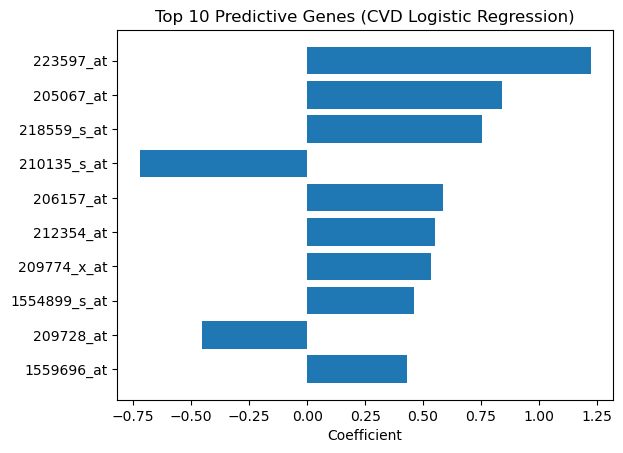

In [59]:
import matplotlib.pyplot as plt

plt.barh(top_10_genes, top_10_coefs)
plt.xlabel("Coefficient")
plt.title("Top 10 Predictive Genes (CVD Logistic Regression)")
plt.gca().invert_yaxis()
plt.savefig('C:/Users/shrij/OneDrive/Desktop/GSE66360-GeneExpression-Analysis/results/top10PredictiveGenes.png')
plt.show()


In [60]:
pd.DataFrame({"Gene": top_10_genes, "Coefficient": top_10_coefs}).to_csv("top10_predictive_genes.csv", index=False)


In [61]:
# Check missing values count per column
missing_counts = X.isnull().sum()
print(missing_counts[missing_counts > 0])

# Simple imputation — fill missing values with column median
X_filled = X.fillna(X.median())


Series([], dtype: int64)


In [62]:
import numpy as np

# Log2 transform if data not already in log scale
X_log = np.log2(X_filled + 1)


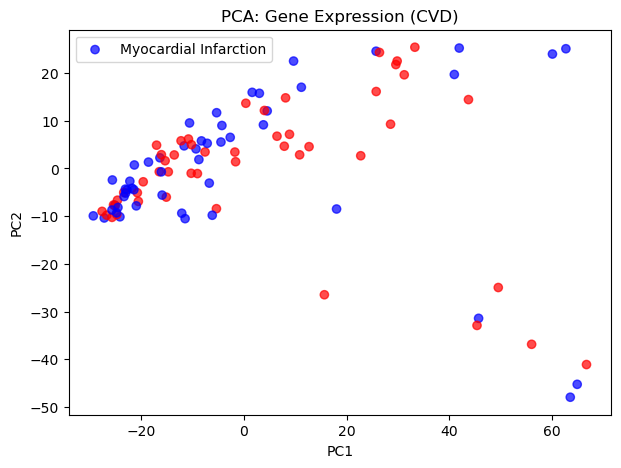

In [70]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_log)

plt.figure(figsize=(7,5))
colors = ['red' if d == 'Myocardial Infarction' else 'blue' for d in expr_df['Diagnosis']]
plt.scatter(X_pca[:,0], X_pca[:,1], c=colors, alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA: Gene Expression (CVD)")
plt.legend(['Myocardial Infarction', 'Control'])
plt.savefig('C:/Users/shrij/OneDrive/Desktop/GSE66360-GeneExpression-Analysis/results/PCAgeneexpression.png')
plt.show()


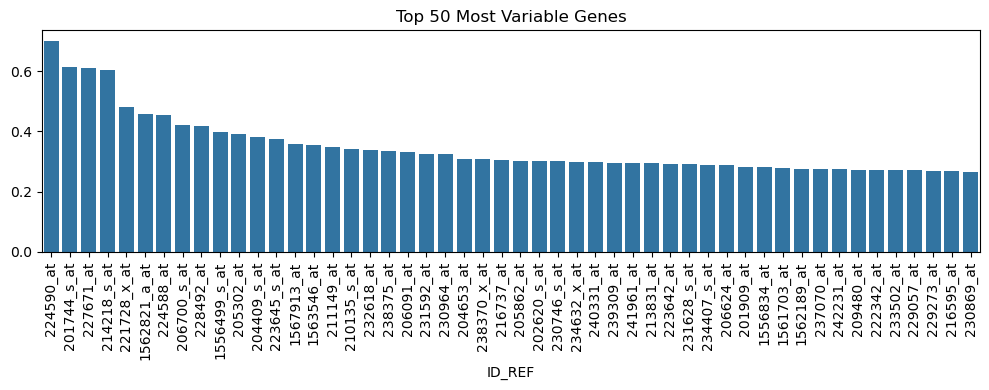

In [64]:
import seaborn as sns

gene_variances = X_log.var().sort_values(ascending=False)[:50]
plt.figure(figsize=(10,4))
sns.barplot(x=gene_variances.index, y=gene_variances.values)
plt.xticks(rotation=90)
plt.title("Top 50 Most Variable Genes")
plt.tight_layout()
plt.savefig('C:/Users/shrij/OneDrive/Desktop/GSE66360-GeneExpression-Analysis/results/top50VariableGenes.png')
plt.show()


In [65]:
import scipy.spatial.distance as dist

dists = dist.pdist(X_log, 'euclidean')
print("Mean pairwise distance:", np.mean(dists))


Mean pairwise distance: 64.79628611951556


In [66]:
import scipy.stats as stats
controls = expr_df[expr_df['Diagnosis'] == 'Control'].drop('Diagnosis', axis=1)
cases = expr_df[expr_df['Diagnosis'] == 'Myocardial Infarction'].drop('Diagnosis', axis=1)

# Perform t-tests for each gene
pvals = []
for gene in X_log.columns:
    stat, p = stats.ttest_ind(controls[gene], cases[gene])
    pvals.append(p)

# Collect top significant genes
import pandas as pd
deg_results = pd.DataFrame({'Gene': X_log.columns, 'pval': pvals})
deg_results = deg_results.sort_values('pval')
print(deg_results.head(10))


              Gene          pval
25540  216248_s_at  6.949837e-20
18284  208869_s_at  1.132051e-18
14069  204622_x_at  5.959763e-18
53304    244054_at  7.665845e-17
13335    203888_at  1.393074e-15
18283  208868_s_at  2.065622e-15
49352    240103_at  2.588350e-15
13334  203887_s_at  3.930740e-15
13021    203574_at  5.624793e-15
27844  218559_s_at  2.831905e-14


In [67]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model_top, X_train_top_scaled, y_train, cv=5, scoring='roc_auc')
print("Cross-validated ROC AUC scores:", cv_scores)
print("Mean CV ROC AUC:", cv_scores.mean())


Cross-validated ROC AUC scores: [1.         0.90625    0.828125   0.9375     0.94642857]
Mean CV ROC AUC: 0.9236607142857143


In [71]:
import scipy.stats as stats
import pandas as pd

# Separate expression by diagnosis
controls = expr_df[expr_df['Diagnosis'] == 'Control'].drop('Diagnosis', axis=1)
cases = expr_df[expr_df['Diagnosis'] == 'Myocardial Infarction'].drop('Diagnosis', axis=1)

# Perform t-test for each gene
pvals = []
for gene in expr_df.columns[:-1]:  # exclude 'Diagnosis' column
    stat, p = stats.ttest_ind(controls[gene], cases[gene], equal_var=False)
    pvals.append(p)

# Compile results into DataFrame
deg_results = pd.DataFrame({'Gene': expr_df.columns[:-1], 'pval': pvals})
deg_results = deg_results.sort_values('pval')

# Display top 10 significant genes
deg_results.head(10)


,Gene,pval
25540,216248_s_at,1.280883e-19
18284,208869_s_at,2.989947e-18
14069,204622_x_at,8.400521e-18
53304,244054_at,5.909667e-16
18283,208868_s_at,6.733958e-15
13021,203574_at,7.759318e-15
49352,240103_at,9.206444e-15
13335,203888_at,1.522553e-14
14068,204621_s_at,3.235876e-14
27844,218559_s_at,4.408196e-14


In [72]:
!conda install -y statsmodels


Jupyter detected...
3 channel Terms of Service accepted
Retrieving notices: done
Channels:
 - defaults
Platform: win-64
Solving environment: done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
    current version: 25.5.1
    latest version: 25.7.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [73]:
from statsmodels.stats.multitest import multipletests

deg_results['adj_pval'] = multipletests(deg_results['pval'], method='fdr_bh')[1]
deg_results.sort_values('adj_pval').head(10)


,Gene,pval,adj_pval
25540,216248_s_at,1.280883e-19,7.003229e-15
18284,208869_s_at,2.989947e-18,8.173767e-14
14069,204622_x_at,8.400521e-18,1.530995e-13
53304,244054_at,5.909667e-16,8.077776e-12
18283,208868_s_at,6.733958e-15,7.070679e-11
13021,203574_at,7.759318e-15,7.070679e-11
49352,240103_at,9.206444e-15,7.190890e-11
13335,203888_at,1.522553e-14,1.040570e-10
14068,204621_s_at,3.235876e-14,1.965794e-10
27844,218559_s_at,4.408196e-14,2.410181e-10


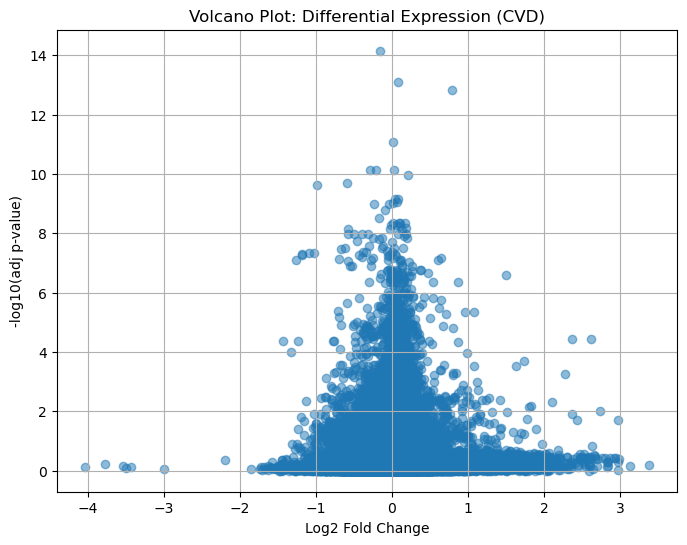

In [74]:
# Calculate log2 fold change
mean_control = controls.mean()
mean_case = cases.mean()
log2_fc = mean_case - mean_control
deg_results['log2_fc'] = log2_fc.values

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,6))
plt.scatter(deg_results['log2_fc'], -np.log10(deg_results['adj_pval']), alpha=0.5)
plt.xlabel('Log2 Fold Change')
plt.ylabel('-log10(adj p-value)')
plt.title('Volcano Plot: Differential Expression (CVD)')
plt.grid(True)
plt.savefig('C:/Users/shrij/OneDrive/Desktop/GSE66360-GeneExpression-Analysis/results/VolcanoPlot.png')
plt.show()


In [42]:
top_genes = deg_results[deg_results['adj_pval'] < 0.05].sort_values('adj_pval').head(50)['Gene']
top_genes.to_csv("top_de_genes.csv", index=False)
print(top_genes)


25540     216248_s_at
18284     208869_s_at
14069     204622_x_at
53304       244054_at
18283     208868_s_at
13021       203574_at
49352       240103_at
13335       203888_at
14068     204621_s_at
27844     218559_s_at
32213     222934_s_at
13334     203887_s_at
50528       241279_at
14355     204908_s_at
15310       205863_at
19821     210423_s_at
2112     1555167_s_at
20708     211372_s_at
26489     217202_s_at
29318       220034_at
14850       205403_at
13268       203821_at
14514       205067_at
8878       1568830_at
19550     210146_x_at
14067     204620_s_at
14686       205239_at
11411       201963_at
14923       205476_at
25307     216015_s_at
54329        39402_at
54090     244840_x_at
19182     209774_x_at
31011     221731_x_at
20645     211302_s_at
16720     207275_s_at
20225     210845_s_at
21232     211924_s_at
41467       232213_at
4137       1558299_at
54263        37028_at
19365       209959_at
13798       204351_at
25282     215990_s_at
54302        38037_at
13679     

In [43]:
with open("GPL570-55999.txt") as f:
    for _ in range(20):
        print(f.readline().strip())


#ID = Affymetrix Probe Set ID
#GB_ACC = GenBank Accession Number
#SPOT_ID = identifies controls
#Species Scientific Name = The genus and species of the organism represented by the probe set.
#Annotation Date = The date that the annotations for this probe array were last updated. It will generally be earlier than the date when the annotations were posted on the Affymetrix web site.
#Sequence Type =
#Sequence Source = The database from which the sequence used to design this probe set was taken.
#Target Description =
#Representative Public ID = The accession number of a representative sequence. Note that for consensus-based probe sets, the representative sequence is only one of several sequences (sequence sub-clusters) used to build the consensus sequence and it is not directly used to derive the probe sequences. The representative sequence is chosen during array design as a sequence that is best associated with the transcribed region being interrogated by the probe set. Refer to the "Seq

In [45]:
with open("GPL570-55999.txt") as f:
    for i in range(30):
        print(f.readline().strip())


#ID = Affymetrix Probe Set ID
#GB_ACC = GenBank Accession Number
#SPOT_ID = identifies controls
#Species Scientific Name = The genus and species of the organism represented by the probe set.
#Annotation Date = The date that the annotations for this probe array were last updated. It will generally be earlier than the date when the annotations were posted on the Affymetrix web site.
#Sequence Type =
#Sequence Source = The database from which the sequence used to design this probe set was taken.
#Target Description =
#Representative Public ID = The accession number of a representative sequence. Note that for consensus-based probe sets, the representative sequence is only one of several sequences (sequence sub-clusters) used to build the consensus sequence and it is not directly used to derive the probe sequences. The representative sequence is chosen during array design as a sequence that is best associated with the transcribed region being interrogated by the probe set. Refer to the "Seq

In [46]:
table_start_line = 28  # change based on your inspection
ann = pd.read_csv("GPL570-55999.txt", sep="\t", skiprows=table_start_line)
print(ann.columns)
ann.head()


Index(['1487_at', 'L38487', 'Unnamed: 2', 'Homo sapiens', 'Oct 6, 2014',
       'Exemplar sequence', 'Affymetrix Proprietary Database',
       'L38487 /FEATURE=mRNA /DEFINITION=HUMHERRA1 Human estrogen receptor-related protein (hERRa1) mRNA, 3' end, partial cds',
       'L38487.1', 'estrogen-related receptor alpha', 'ESRRA', '2101',
       'NM_001282450 /// NM_001282451 /// NM_004451 /// XM_006718449 /// XM_006718450',
       '0006351 // transcription, DNA-templated // inferred from electronic annotation /// 0006355 // regulation of transcription, DNA-templated // inferred from mutant phenotype /// 0006367 // transcription initiation from RNA polymerase II promoter // traceable author statement /// 0010467 // gene expression // traceable author statement /// 0030278 // regulation of ossification // inferred from electronic annotation /// 0030522 // intracellular receptor signaling pathway // traceable author statement /// 0042127 // regulation of cell proliferation // inferred from ele

C:\Users\shrij\AppData\Local\Temp\ipykernel_24784\4051560040.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  ann = pd.read_csv("GPL570-55999.txt", sep="\t", skiprows=table_start_line)


,1487_at,L38487,Unnamed: 2,Homo sapiens,"Oct 6, 2014",Exemplar sequence,Affymetrix Proprietary Database,"L38487 /FEATURE=mRNA /DEFINITION=HUMHERRA1 Human estrogen receptor-related protein (hERRa1) mRNA, 3' end, partial cds",L38487.1,estrogen-related receptor alpha,ESRRA,2101,NM_001282450 /// NM_001282451 /// NM_004451 /// XM_006718449 /// XM_006718450,"0006351 // transcription, DNA-templated // inferred from electronic annotation /// 0006355 // regulation of transcription, DNA-templated // inferred from mutant phenotype /// 0006367 // transcription initiation from RNA polymerase II promoter // traceable author statement /// 0010467 // gene expression // traceable author statement /// 0030278 // regulation of ossification // inferred from electronic annotation /// 0030522 // intracellular receptor signaling pathway // traceable author statement /// 0042127 // regulation of cell proliferation // inferred from electronic annotation /// 0043401 // steroid hormone mediated signaling pathway // inferred from electronic annotation /// 0045667 // regulation of osteoblast differentiation // inferred from electronic annotation /// 0045670 // regulation of osteoclast differentiation // inferred from electronic annotation /// 0045893 // positive regulation of transcription, DNA-templated // inferred from electronic annotation /// 0045944 // positive regulation of transcription from RNA polymerase II promoter // inferred from sequence or structural similarity /// 0051216 // cartilage development // inferred from electronic annotation",0005634 // nucleus // inferred from direct assay /// 0005654 // nucleoplasm // traceable author statement /// 0005730 // nucleolus // inferred from direct assay /// 0015630 // microtubule cytoskeleton // inferred from direct assay /// 0045171 // intercellular bridge // inferred from direct assay,0003677 // DNA binding // traceable author statement /// 0003700 // sequence-specific DNA binding transcription factor activity // inferred from electronic annotation /// 0003707 // steroid hormone receptor activity // inferred from electronic annotation /// 0004879 // ligand-activated sequence-specific DNA binding RNA polymerase II transcription factor activity // traceable author statement /// 0005496 // steroid binding // inferred from electronic annotation /// 0005515 // protein binding // inferred from physical interaction /// 0008270 // zinc ion binding // inferred from electronic annotation /// 0019904 // protein domain specific binding // inferred from physical interaction /// 0043565 // sequence-specific DNA binding // inferred from direct assay /// 0046872 // metal ion binding // inferred from electronic annotation
0,1494_f_at,M33318,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,Affymetrix Proprietary Database,M33318 /FEATURE=mRNA /DEFINITION=HUMCPIIA3A Hu...,M33318,"cytochrome P450, family 2, subfamily A, polype...",CYP2A6,1548,NM_000762,0006805 // xenobiotic metabolic process // tra...,0005783 // endoplasmic reticulum // inferred f...,0004497 // monooxygenase activity // inferred ...
1,1552256_a_at,NM_005505,NaN,Homo sapiens,"Oct 6, 2014",Consensus sequence,GenBank,gb:NM_005505.2 /DB_XREF=gi:21361199 /GEN=SCARB...,NM_005505,"scavenger receptor class B, member 1",SCARB1,949,NM_001082959 /// NM_005505,0001935 // endothelial cell proliferation // i...,0005737 // cytoplasm // inferred from electron...,0001530 // lipopolysaccharide binding // infer...
2,1552257_a_at,NM_015140,NaN,Homo sapiens,"Oct 6, 2014",Consensus sequence,GenBank,gb:NM_015140.1 /DB_XREF=gi:11056035 /TID=Hs2.8...,NM_015140,"tubulin tyrosine ligase-like family, member 12",TTLL12,23170,NM_015140,0006464 // cellular protein modification proce...,NaN,NaN
3,1552258_at,NM_052871,NaN,Homo sapiens,"Oct 6, 2014",Consensus sequence,GenBank,gb:NM_052871.1 /DB_XREF=gi:16418372 /TID=Hs2.4...,NM_052871,long intergenic non-protein coding RNA 152 ///...,LINC00152 /// LOC101930489,112597 /// 101930489,NM_052871 /// NR_024204 /// NR_024205 /// NR_0...,NaN,N

In [48]:
print(list(ann.columns))


['1487_at', 'L38487', 'Unnamed: 2', 'Homo sapiens', 'Oct 6, 2014', 'Exemplar sequence', 'Affymetrix Proprietary Database', "L38487 /FEATURE=mRNA /DEFINITION=HUMHERRA1 Human estrogen receptor-related protein (hERRa1) mRNA, 3' end, partial cds", 'L38487.1', 'estrogen-related receptor alpha', 'ESRRA', '2101', 'NM_001282450 /// NM_001282451 /// NM_004451 /// XM_006718449 /// XM_006718450', '0006351 // transcription, DNA-templated // inferred from electronic annotation /// 0006355 // regulation of transcription, DNA-templated // inferred from mutant phenotype /// 0006367 // transcription initiation from RNA polymerase II promoter // traceable author statement /// 0010467 // gene expression // traceable author statement /// 0030278 // regulation of ossification // inferred from electronic annotation /// 0030522 // intracellular receptor signaling pathway // traceable author statement /// 0042127 // regulation of cell proliferation // inferred from electronic annotation /// 0043401 // steroid

In [49]:
for idx, name in enumerate(ann.columns):
    print(f"{idx}: {name}")


0: 1487_at
1: L38487
2: Unnamed: 2
3: Homo sapiens
4: Oct 6, 2014
5: Exemplar sequence
6: Affymetrix Proprietary Database
7: L38487 /FEATURE=mRNA /DEFINITION=HUMHERRA1 Human estrogen receptor-related protein (hERRa1) mRNA, 3' end, partial cds
8: L38487.1
9: estrogen-related receptor alpha
10: ESRRA
11: 2101
12: NM_001282450 /// NM_001282451 /// NM_004451 /// XM_006718449 /// XM_006718450
13: 0006351 // transcription, DNA-templated // inferred from electronic annotation /// 0006355 // regulation of transcription, DNA-templated // inferred from mutant phenotype /// 0006367 // transcription initiation from RNA polymerase II promoter // traceable author statement /// 0010467 // gene expression // traceable author statement /// 0030278 // regulation of ossification // inferred from electronic annotation /// 0030522 // intracellular receptor signaling pathway // traceable author statement /// 0042127 // regulation of cell proliferation // inferred from electronic annotation /// 0043401 // st

In [51]:
print(ann.iloc[0].to_dict())


{'1487_at': '1494_f_at', 'L38487': 'M33318', 'Unnamed: 2': nan, 'Homo sapiens': 'Homo sapiens', 'Oct 6, 2014': 'Oct 6, 2014', 'Exemplar sequence': 'Exemplar sequence', 'Affymetrix Proprietary Database': 'Affymetrix Proprietary Database', "L38487 /FEATURE=mRNA /DEFINITION=HUMHERRA1 Human estrogen receptor-related protein (hERRa1) mRNA, 3' end, partial cds": 'M33318 /FEATURE=mRNA /DEFINITION=HUMCPIIA3A Human cytochrome P450IIA3 (CYP2A3) mRNA, complete cds', 'L38487.1': 'M33318', 'estrogen-related receptor alpha': 'cytochrome P450, family 2, subfamily A, polypeptide 6', 'ESRRA': 'CYP2A6', '2101': '1548', 'NM_001282450 /// NM_001282451 /// NM_004451 /// XM_006718449 /// XM_006718450': 'NM_000762', '0006351 // transcription, DNA-templated // inferred from electronic annotation /// 0006355 // regulation of transcription, DNA-templated // inferred from mutant phenotype /// 0006367 // transcription initiation from RNA polymerase II promoter // traceable author statement /// 0010467 // gene exp

In [52]:
for idx, val in enumerate(ann.iloc[0]):
    print(f"{idx}: {val}")


0: 1494_f_at
1: M33318
2: nan
3: Homo sapiens
4: Oct 6, 2014
5: Exemplar sequence
6: Affymetrix Proprietary Database
7: M33318 /FEATURE=mRNA /DEFINITION=HUMCPIIA3A Human cytochrome P450IIA3 (CYP2A3) mRNA, complete cds
8: M33318
9: cytochrome P450, family 2, subfamily A, polypeptide 6
10: CYP2A6
11: 1548
12: NM_000762
13: 0006805 // xenobiotic metabolic process // traceable author statement /// 0008202 // steroid metabolic process // inferred from mutant phenotype /// 0009804 // coumarin metabolic process // inferred from direct assay /// 0017144 // drug metabolic process // inferred from direct assay /// 0017144 // drug metabolic process // inferred from mutant phenotype /// 0042738 // exogenous drug catabolic process // inferred from direct assay /// 0044281 // small molecule metabolic process // traceable author statement /// 0046226 // coumarin catabolic process // inferred from direct assay /// 0055114 // oxidation-reduction process // inferred from electronic annotation
14: 000578

In [54]:
for idx, val in enumerate(ann.iloc[0]):
    print(f"{idx}: {val}")


0: 1494_f_at
1: M33318
2: nan
3: Homo sapiens
4: Oct 6, 2014
5: Exemplar sequence
6: Affymetrix Proprietary Database
7: M33318 /FEATURE=mRNA /DEFINITION=HUMCPIIA3A Human cytochrome P450IIA3 (CYP2A3) mRNA, complete cds
8: M33318
9: cytochrome P450, family 2, subfamily A, polypeptide 6
10: CYP2A6
11: 1548
12: NM_000762
13: 0006805 // xenobiotic metabolic process // traceable author statement /// 0008202 // steroid metabolic process // inferred from mutant phenotype /// 0009804 // coumarin metabolic process // inferred from direct assay /// 0017144 // drug metabolic process // inferred from direct assay /// 0017144 // drug metabolic process // inferred from mutant phenotype /// 0042738 // exogenous drug catabolic process // inferred from direct assay /// 0044281 // small molecule metabolic process // traceable author statement /// 0046226 // coumarin catabolic process // inferred from direct assay /// 0055114 // oxidation-reduction process // inferred from electronic annotation
14: 000578

In [55]:
print(ann.columns[0:20])


Index(['1487_at', 'L38487', 'Unnamed: 2', 'Homo sapiens', 'Oct 6, 2014',
       'Exemplar sequence', 'Affymetrix Proprietary Database',
       'L38487 /FEATURE=mRNA /DEFINITION=HUMHERRA1 Human estrogen receptor-related protein (hERRa1) mRNA, 3' end, partial cds',
       'L38487.1', 'estrogen-related receptor alpha', 'ESRRA', '2101',
       'NM_001282450 /// NM_001282451 /// NM_004451 /// XM_006718449 /// XM_006718450',
       '0006351 // transcription, DNA-templated // inferred from electronic annotation /// 0006355 // regulation of transcription, DNA-templated // inferred from mutant phenotype /// 0006367 // transcription initiation from RNA polymerase II promoter // traceable author statement /// 0010467 // gene expression // traceable author statement /// 0030278 // regulation of ossification // inferred from electronic annotation /// 0030522 // intracellular receptor signaling pathway // traceable author statement /// 0042127 // regulation of cell proliferation // inferred from ele

In [56]:
probe_col = ann.columns[0]
gene_symbol_col = ann.columns[13]   # update 13 to your correct index

ann_sub = ann[[probe_col, gene_symbol_col]].copy()
ann_sub.columns = ['Gene', 'GeneSymbol']
print(ann_sub.head(10))


           Gene                                         GeneSymbol
0     1494_f_at  0006805 // xenobiotic metabolic process // tra...
1  1552256_a_at  0001935 // endothelial cell proliferation // i...
2  1552257_a_at  0006464 // cellular protein modification proce...
3    1552258_at                                                NaN
4    1552261_at  0006508 // proteolysis // traceable author sta...
5    1552263_at  0000165 // MAPK cascade // traceable author st...
6  1552264_a_at  0000165 // MAPK cascade // traceable author st...
7    1552266_at  0006508 // proteolysis // inferred from electr...
8    1552269_at                                                NaN
9    1552271_at                                                NaN


In [57]:
ann_sub['GeneSymbol'] = ann_sub['GeneSymbol'].astype(str).str.split(' ').str[0]
ann_sub['GeneSymbol'] = ann_sub['GeneSymbol'].str.split('///').str[0]
print(ann_sub.head(10))


           Gene GeneSymbol
0     1494_f_at    0006805
1  1552256_a_at    0001935
2  1552257_a_at    0006464
3    1552258_at        nan
4    1552261_at    0006508
5    1552263_at    0000165
6  1552264_a_at    0000165
7    1552266_at    0006508
8    1552269_at        nan
9    1552271_at        nan


In [58]:
deg_annotated = pd.merge(deg_results, ann_sub, on='Gene', how='left')
print(deg_annotated[['Gene', 'GeneSymbol', 'adj_pval']].head(10))


          Gene GeneSymbol      adj_pval
0  216248_s_at    0001666  7.003229e-15
1  208869_s_at    0000045  8.173767e-14
2  204622_x_at    0001666  1.530995e-13
3    244054_at        nan  8.077776e-12
4  208868_s_at    0000045  7.070679e-11
5    203574_at    0000122  7.070679e-11
6    240103_at        nan  7.190890e-11
7    203888_at    0007165  1.040570e-10
8  204621_s_at    0001666  1.965794e-10
9  218559_s_at    0006351  2.410181e-10


In [59]:
deg_annotated.to_csv("DEGs_with_GeneSymbol.csv", index=False)


In [60]:
# Filter out empty/non-informative symbols
gene_list = deg_annotated['GeneSymbol'].dropna().unique()
with open("GeneSymbol_list.txt", "w") as f:
    for gene in gene_list:
        f.write(str(gene) + "\n")


In [61]:
import os
print(os.listdir())


['.conda', '.config', '.idlerc', '.ipynb_checkpoints', '.ipython', '.jupyter', '.matplotlib', '.thumbnails', 'AppData', 'Application Data', 'Contacts', 'Cookies', 'DEGs_with_GeneSymbol.csv', 'Desktop', 'Documents', 'Downloads', 'Dropbox', 'Favorites', 'GeneSymbol_list.txt', 'GPL570-55999.txt', 'GSE66360_series_matrix.txt.gz', 'Links', 'Local Settings', 'miniconda3', 'Music', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{cabe2134-40e6-11f0-8441-88abdee76abe}.TM.blf', 'NTUSER.DAT{cabe2134-40e6-11f0-8441-88abdee76abe}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{cabe2134-40e6-11f0-8441-88abdee76abe}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'PrintHood', 'py', 'python', 'Recent', 'Saved Games', 'Searches', 'SendTo', 'Start Menu', 'Templates', 'top10_predictive_genes.csv', 'top_de_genes.csv', 'Untitled.ipynb', 'Untitled1.ipynb', 'Videos', 'Zotero']


In [62]:
# For CSV
with open("DEGs_with_GeneSymbol.csv") as f:
    for _ in range(5):
        print(f.readline().strip())

# For TXT gene list
with open("GeneSymbol_list.txt") as f:
    for _ in range(5):
        print(f.readline().strip())


Gene,pval,adj_pval,log2_fc,GeneSymbol
216248_s_at,1.2808832548522478e-19,7.003229195904665e-15,-0.1514472452907789,0001666
208869_s_at,2.9899468718277424e-18,8.173767260859091e-14,0.07642444893839251,0000045
204622_x_at,8.400520807987535e-18,1.5309949172557282e-13,0.7844275205857798,0001666
244054_at,5.909666787788285e-16,8.077775790558111e-12,0.009883707715247603,nan
0001666
0000045
nan
0000122
0007165


In [63]:
print(list(ann.columns))


['1487_at', 'L38487', 'Unnamed: 2', 'Homo sapiens', 'Oct 6, 2014', 'Exemplar sequence', 'Affymetrix Proprietary Database', "L38487 /FEATURE=mRNA /DEFINITION=HUMHERRA1 Human estrogen receptor-related protein (hERRa1) mRNA, 3' end, partial cds", 'L38487.1', 'estrogen-related receptor alpha', 'ESRRA', '2101', 'NM_001282450 /// NM_001282451 /// NM_004451 /// XM_006718449 /// XM_006718450', '0006351 // transcription, DNA-templated // inferred from electronic annotation /// 0006355 // regulation of transcription, DNA-templated // inferred from mutant phenotype /// 0006367 // transcription initiation from RNA polymerase II promoter // traceable author statement /// 0010467 // gene expression // traceable author statement /// 0030278 // regulation of ossification // inferred from electronic annotation /// 0030522 // intracellular receptor signaling pathway // traceable author statement /// 0042127 // regulation of cell proliferation // inferred from electronic annotation /// 0043401 // steroid

In [65]:
print(list(ann.columns))


['1487_at', 'L38487', 'Unnamed: 2', 'Homo sapiens', 'Oct 6, 2014', 'Exemplar sequence', 'Affymetrix Proprietary Database', "L38487 /FEATURE=mRNA /DEFINITION=HUMHERRA1 Human estrogen receptor-related protein (hERRa1) mRNA, 3' end, partial cds", 'L38487.1', 'estrogen-related receptor alpha', 'ESRRA', '2101', 'NM_001282450 /// NM_001282451 /// NM_004451 /// XM_006718449 /// XM_006718450', '0006351 // transcription, DNA-templated // inferred from electronic annotation /// 0006355 // regulation of transcription, DNA-templated // inferred from mutant phenotype /// 0006367 // transcription initiation from RNA polymerase II promoter // traceable author statement /// 0010467 // gene expression // traceable author statement /// 0030278 // regulation of ossification // inferred from electronic annotation /// 0030522 // intracellular receptor signaling pathway // traceable author statement /// 0042127 // regulation of cell proliferation // inferred from electronic annotation /// 0043401 // steroid

In [67]:
for idx, name in enumerate(ann.columns):
    print(f"{idx}: {name}")


0: 1487_at
1: L38487
2: Unnamed: 2
3: Homo sapiens
4: Oct 6, 2014
5: Exemplar sequence
6: Affymetrix Proprietary Database
7: L38487 /FEATURE=mRNA /DEFINITION=HUMHERRA1 Human estrogen receptor-related protein (hERRa1) mRNA, 3' end, partial cds
8: L38487.1
9: estrogen-related receptor alpha
10: ESRRA
11: 2101
12: NM_001282450 /// NM_001282451 /// NM_004451 /// XM_006718449 /// XM_006718450
13: 0006351 // transcription, DNA-templated // inferred from electronic annotation /// 0006355 // regulation of transcription, DNA-templated // inferred from mutant phenotype /// 0006367 // transcription initiation from RNA polymerase II promoter // traceable author statement /// 0010467 // gene expression // traceable author statement /// 0030278 // regulation of ossification // inferred from electronic annotation /// 0030522 // intracellular receptor signaling pathway // traceable author statement /// 0042127 // regulation of cell proliferation // inferred from electronic annotation /// 0043401 // st

In [69]:
for idx, name in enumerate(ann.columns):
    print(f"{idx}: {name}")


0: 1487_at
1: L38487
2: Unnamed: 2
3: Homo sapiens
4: Oct 6, 2014
5: Exemplar sequence
6: Affymetrix Proprietary Database
7: L38487 /FEATURE=mRNA /DEFINITION=HUMHERRA1 Human estrogen receptor-related protein (hERRa1) mRNA, 3' end, partial cds
8: L38487.1
9: estrogen-related receptor alpha
10: ESRRA
11: 2101
12: NM_001282450 /// NM_001282451 /// NM_004451 /// XM_006718449 /// XM_006718450
13: 0006351 // transcription, DNA-templated // inferred from electronic annotation /// 0006355 // regulation of transcription, DNA-templated // inferred from mutant phenotype /// 0006367 // transcription initiation from RNA polymerase II promoter // traceable author statement /// 0010467 // gene expression // traceable author statement /// 0030278 // regulation of ossification // inferred from electronic annotation /// 0030522 // intracellular receptor signaling pathway // traceable author statement /// 0042127 // regulation of cell proliferation // inferred from electronic annotation /// 0043401 // st

In [3]:
import pandas as pd
ann = pd.read_csv('DEGs_with_GeneSymbol.csv')
print(ann.columns)  # Verify columns are as expected


Index(['Gene', 'pval', 'adj_pval', 'log2_fc', 'GeneSymbol'], dtype='object')


In [4]:
probe_col = 'Gene'       # Update this to your actual column name
gene_symbol_col = 'GeneSymbol'  # Update as needed

ann_sub = ann[[probe_col, gene_symbol_col]].copy()
ann_sub.columns = ['Gene', 'GeneSymbol']

# Clean up gene symbols if there are delimiters (e.g., “///”)
ann_sub['GeneSymbol'] = ann_sub['GeneSymbol'].astype(str).str.split('///').str[0]

print(ann_sub.head(10))


          Gene GeneSymbol
0  216248_s_at     1666.0
1  208869_s_at       45.0
2  204622_x_at     1666.0
3    244054_at        nan
4  208868_s_at       45.0
5    203574_at      122.0
6    240103_at        nan
7    203888_at     7165.0
8  204621_s_at     1666.0
9  218559_s_at     6351.0


In [5]:
# Remove rows where GeneSymbol is missing or not a valid string (optional)
ann_sub = ann_sub[ann_sub['GeneSymbol'].notna()]
ann_sub = ann_sub[ann_sub['GeneSymbol'].apply(lambda x: isinstance(x, str) and x.isalpha())]
print(ann_sub.head(10))


           Gene GeneSymbol
3     244054_at        nan
6     240103_at        nan
12    241279_at        nan
39   1558299_at        nan
49    240038_at        nan
55    235536_at        nan
94   1563118_at        nan
98    235739_at        nan
104   244026_at        nan
107  1562194_at        nan


In [6]:
ann_sub['GeneSymbol'].to_csv('clean_gene_symbols.txt', index=False, header=False)


In [7]:
# Load and display the first few lines to verify
with open('clean_gene_symbols.txt') as f:
    for _ in range(10):
        print(next(f).strip())


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [8]:
print(ann[['Gene', 'GeneSymbol']].head(20))



            Gene  GeneSymbol
0    216248_s_at      1666.0
1    208869_s_at        45.0
2    204622_x_at      1666.0
3      244054_at         NaN
4    208868_s_at        45.0
5      203574_at       122.0
6      240103_at         NaN
7      203888_at      7165.0
8    204621_s_at      1666.0
9    218559_s_at      6351.0
10   222934_s_at      2376.0
11   203887_s_at      7165.0
12     241279_at         NaN
13   204908_s_at        60.0
14   210423_s_at        60.0
15     205863_at      2376.0
16  1555167_s_at      6766.0
17   211372_s_at      6955.0
18   217202_s_at      1504.0
19     220034_at      1960.0


In [9]:
# Remove rows with missing or non-string symbols
ann_sub = ann[ann['GeneSymbol'].notna()]
ann_sub = ann_sub[ann_sub['GeneSymbol'].apply(lambda x: isinstance(x, str) and not x.isnumeric() and x.strip().isalpha())]
print(ann_sub[['Gene', 'GeneSymbol']].head(10))



Empty DataFrame
Columns: [Gene, GeneSymbol]
Index: []


In [10]:
# Load another file
df_alt = pd.read_csv('top_de_genes.csv')
print(df_alt.head())
print(df_alt.columns)


          Gene
0  216248_s_at
1  208869_s_at
2  204622_x_at
3    244054_at
4  208868_s_at
Index(['Gene'], dtype='object')


In [12]:
with open('GPL570-55999.txt', 'r') as f:
    lines = f.readlines()

# Skip lines until you reach the line where data starts (after comments)
# For example, header could be at line 37
data_lines = lines[37:]  # adjust as needed


In [13]:
parsed_data = []

for line in data_lines:
    # Split by triple slash delimiter with spaces trimmed
    parts = [part.strip() for part in line.split('///')]
    parsed_data.append(parts)

# Check the first parsed row
print(parsed_data[0])


['1552269_at\tNM_138796\t\tHomo sapiens\tOct 6, 2014\tConsensus sequence\tGenBank\tgb:NM_138796.1 /DB_XREF=gi:20270344 /TID=Hs2.99214.1 /CNT=32 /FEA=FLmRNA /TIER=FL+Stack /STK=14 /LL=128153 /UG_GENE=LOC128153 /UG=Hs.99214 /UG_TITLE=hypothetical protein BC014608 /DEF=Homo sapiens hypothetical protein BC014608 (LOC128153), mRNA. /FL=gb:NM_138796.1 gb:BC014608.1\tNM_138796\tspermatogenesis associated 17\tSPATA17\t128153\tNM_138796', 'XM_005273052', 'XM_006711165\t\t0005737 // cytoplasm // inferred from electronic annotation\t0005515 // protein binding // inferred from electronic annotation', '0005516 // calmodulin binding // inferred from electronic annotation']


In [15]:
for i in range(5):
    print(len(parsed_data[i]), parsed_data[i])


4 ['1552269_at\tNM_138796\t\tHomo sapiens\tOct 6, 2014\tConsensus sequence\tGenBank\tgb:NM_138796.1 /DB_XREF=gi:20270344 /TID=Hs2.99214.1 /CNT=32 /FEA=FLmRNA /TIER=FL+Stack /STK=14 /LL=128153 /UG_GENE=LOC128153 /UG=Hs.99214 /UG_TITLE=hypothetical protein BC014608 /DEF=Homo sapiens hypothetical protein BC014608 (LOC128153), mRNA. /FL=gb:NM_138796.1 gb:BC014608.1\tNM_138796\tspermatogenesis associated 17\tSPATA17\t128153\tNM_138796', 'XM_005273052', 'XM_006711165\t\t0005737 // cytoplasm // inferred from electronic annotation\t0005515 // protein binding // inferred from electronic annotation', '0005516 // calmodulin binding // inferred from electronic annotation']
2 ['1552271_at\tNM_153359\t\tHomo sapiens\tOct 6, 2014\tConsensus sequence\tGenBank\tgb:NM_153359.1 /DB_XREF=gi:23503298 /TID=Hs2.214543.1 /CNT=20 /FEA=FLmRNA /TIER=FL+Stack /STK=13 /LL=163154 /UG_GENE=MGC24975 /UG=Hs.214543 /UG_TITLE=hypothetical protein MGC24975 /DEF=Homo sapiens hypothetical protein MGC24975 (MGC24975), mRNA.

In [16]:
for i, item in enumerate(parsed_data[:20]):
    print(f"Column {i}: {item}")


Column 0: ['1552269_at\tNM_138796\t\tHomo sapiens\tOct 6, 2014\tConsensus sequence\tGenBank\tgb:NM_138796.1 /DB_XREF=gi:20270344 /TID=Hs2.99214.1 /CNT=32 /FEA=FLmRNA /TIER=FL+Stack /STK=14 /LL=128153 /UG_GENE=LOC128153 /UG=Hs.99214 /UG_TITLE=hypothetical protein BC014608 /DEF=Homo sapiens hypothetical protein BC014608 (LOC128153), mRNA. /FL=gb:NM_138796.1 gb:BC014608.1\tNM_138796\tspermatogenesis associated 17\tSPATA17\t128153\tNM_138796', 'XM_005273052', 'XM_006711165\t\t0005737 // cytoplasm // inferred from electronic annotation\t0005515 // protein binding // inferred from electronic annotation', '0005516 // calmodulin binding // inferred from electronic annotation']
Column 1: ['1552271_at\tNM_153359\t\tHomo sapiens\tOct 6, 2014\tConsensus sequence\tGenBank\tgb:NM_153359.1 /DB_XREF=gi:23503298 /TID=Hs2.214543.1 /CNT=20 /FEA=FLmRNA /TIER=FL+Stack /STK=13 /LL=163154 /UG_GENE=MGC24975 /UG=Hs.214543 /UG_TITLE=hypothetical protein MGC24975 /DEF=Homo sapiens hypothetical protein MGC24975 (

In [17]:
import pandas as pd

cleaned_data = []

for line in data_lines:
    triple_split = [part.strip() for part in line.split('///')]
    # Now split the first part further by tab
    first_split = triple_split[0].split('\t')
    
    # Assuming probe ID is first element and gene symbol in, say, 11th (adjust if needed)
    probe_id = first_split[0]  # e.g., '1552269_at'
    # For gene symbol, based on your data gene symbol may be index 10 or 11
    # From your print, gene symbol looks like 10th or 11th element (0-based index)
    try:
        gene_symbol = first_split[10]  # adjust if needed
    except IndexError:
        gene_symbol = None

    cleaned_data.append([probe_id, gene_symbol])

df = pd.DataFrame(cleaned_data, columns=['Probe_ID', 'Gene_Symbol'])
print(df.head(10))


       Probe_ID Gene_Symbol
0    1552269_at     SPATA17
1    1552271_at       PRR22
2  1552272_a_at       PRR22
3    1552274_at         PXK
4  1552275_s_at         PXK
5  1552276_a_at       VPS18
6  1552277_a_at     MSANTD3
7  1552278_a_at     SLC46A1
8  1552279_a_at     SLC46A1
9    1552280_at       TIMD4


In [18]:
probe_list = pd.read_csv('top_de_genes.csv')

# Merge probes with annotation to get gene symbols for your selected probes
merged = pd.merge(probe_list, df, left_on='Gene', right_on='Probe_ID', how='left')
print(merged.head())

          Gene     Probe_ID Gene_Symbol
0  216248_s_at  216248_s_at       NR4A2
1  208869_s_at  208869_s_at   GABARAPL1
2  204622_x_at  204622_x_at       NR4A2
3    244054_at    244054_at        None
4  208868_s_at  208868_s_at   GABARAPL1


In [19]:
merged_clean = merged[merged['Gene_Symbol'].notna()]
merged_clean['Gene_Symbol'].to_csv('clean_gene_symbols.txt', index=False, header=False)

In [21]:
with open('clean_gene_symbols.txt') as f:
    for _ in range(10):
        print(next(f).strip())

NR4A2
GABARAPL1
NR4A2
GABARAPL1
NFIL3
THBD
NR4A2
MAFB
CLEC4E
THBD


In [23]:
!pip install gprofiler-official

In [24]:
from gprofiler import GProfiler

gp = GProfiler(return_dataframe=True)

genes = []
with open('clean_gene_symbols.txt') as f:
    genes = [line.strip() for line in f if line.strip()]

results = gp.profile(organism='hsapiens', query=genes)
print(results.head(10))

  source      native                                            name  \
0  GO:BP  GO:0009617                           response to bacterium   
1  GO:BP  GO:0051239  regulation of multicellular organismal process   
2  GO:BP  GO:0006955                                 immune response   
3  GO:BP  GO:0042221                            response to chemical   
4  GO:BP  GO:0006950                              response to stress   
5  GO:BP  GO:0001775                                 cell activation   
6  GO:BP  GO:0048518       positive regulation of biological process   
7  GO:BP  GO:0045321                            leukocyte activation   
8  GO:BP  GO:0001817               regulation of cytokine production   
9  GO:BP  GO:0060326                                 cell chemotaxis   

        p_value  significant  \
0  2.413068e-09         True   
1  1.324711e-07         True   
2  2.950101e-07         True   
3  3.372732e-07         True   
4  4.150108e-07         True   
5  8.556582e-07

In [25]:
results.to_csv('enrichment_results.csv', index=False)

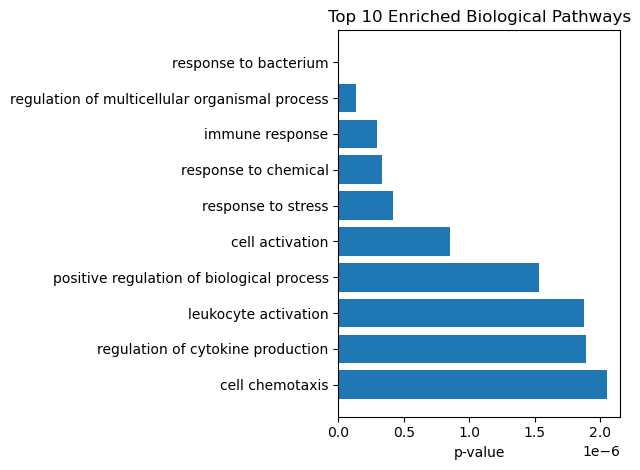

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

results = pd.read_csv('enrichment_results.csv')
top_terms = results[results['significant']].nsmallest(10, 'p_value')

plt.barh(top_terms['name'], top_terms['p_value'])
plt.xlabel('p-value')
plt.title('Top 10 Enriched Biological Pathways')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('C:/Users/shrij/OneDrive/Desktop/GSE66360-GeneExpression-Analysis/results/top10EnrichedPathways.png')
plt.show()